In [1]:
require(ggplot2)
source("00_functions.R")

library(repr)
options(repr.plot.width=8, repr.plot.height=5)
set.seed(111)

Loading required package: ggplot2



 loading required packages



Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2
Loading required package: hypervolume
Loading required package: Rcpp
Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Loading required package: plyr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: codyn
Loading required package: reshape2


### read in data

In [2]:
# abundance
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
#trees_df = read.csv("../Results/trees_genus_matrix.csv", row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)


# presence/absence
#trees_df   = read.csv("../Results/trees_genus_matrix_PA.csv", row.names=1)
#mamls_df = read.csv("../Results/m_trap-year_PA.csv", row.names=1)
#btles_df = read.csv("../Results/btles_matrix_PA.csv", row.names=1)

###########################################################################

# time between censuses
trees_cen = read.csv("../Results/trees_census_dates.csv")
btles_cen = read.csv("../Results/btles_census_dates.csv")
mamls_cen = read.csv("../Results/mamls_years_dates.csv")

### pca on all subplot_census by species matrix

In [3]:
scale = F

trees_pca = do_pca(trees_df, scale = scale, plot = F)
mamls_pca = do_pca(mamls_df, scale = scale, plot = F)
btles_pca = do_pca(btles_df, scale = scale, plot = F)

cat("Explained Varience Trees (first 3 PCs):", sum(trees_pca@exp.var[0:3])*100)
trees_pca@exp.var[0:5]
cat("Explained Varience Mammals (first 3 PCs):", sum(mamls_pca@exp.var[0:3])*100)
mamls_pca@exp.var[0:5]
cat("Explained Varience Beetles: (first 3 PCs)", sum(btles_pca@exp.var[0:3])*100)
btles_pca@exp.var[0:5]

Explained Varience Trees (first 3 PCs): 38.97859

PC1        PC2        PC3        PC4        PC5 
0.28888702 0.05652327 0.04437558 0.03745280 0.03157997

Explained Varience Mammals (first 3 PCs): 61.81098

PC1        PC2        PC3        PC4        PC5 
0.26440642 0.24031383 0.11338956 0.08206127 0.06262138

Explained Varience Beetles: (first 3 PCs) 97.75521

PC1         PC2         PC3         PC4         PC5 
0.875053354 0.084441746 0.018056997 0.006247707 0.004819615

In [4]:
#trees_mds = metaMDS(trees_df, k = 3)
#btles_mds = metaMDS(btles_df, k = 3)
#mamls_mds = metaMDS(mamls_df[rowSums(mamls_df) > 0, ], k = 3)


#trees_mds_out = add_cols(as.data.frame(trees_mds$points))
#mamls_mds_out = add_cols(as.data.frame(mamls_mds$points))
#btles_mds_out = add_cols(as.data.frame(btles_mds$points))

In [5]:
trees_zifa = read.csv("../Results/trees_zifa.csv", row.names = 1)
mamls_zifa = read.csv("../Results/mamls_zifa.csv", row.names = 1)
btles_zifa = read.csv("../Results/btles_zifa.csv", row.names = 1)

trees_zifa = add_cols(trees_zifa)
mamls_zifa = add_cols(mamls_zifa)
btles_zifa = add_cols(btles_zifa)

### construct hyervolumes

#### from pca

In [6]:
trees_hvs_p = hvs_rslts(trees_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", trees_cen, method = "gaussian")
mamls_hvs_p = hvs_rslts(mamls_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", mamls_cen, method = "gaussian")
btles_hvs_p = hvs_rslts(btles_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", btles_cen, method = "gaussian")

# cat("\n\n")
# cat("Trees: ",   sum(is.na(hvs.rslts_trees@rslts$centroid_PC1))/nrow(hvs.rslts_trees@rslts), "\n")
# cat("Mammals: ", sum(is.na(hvs.rslts_mammals@rslts$centroid_PC1))/nrow(hvs.rslts_mammals@rslts), "\n")
# cat("Beetles: ", sum(is.na(hvs.rslts_beetles@rslts$centroid_PC1))/nrow(hvs.rslts_beetles@rslts))


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  28  of  28 :  O_2013
Comparing Hypervolume 24  of  24 :  O_2016-2017

Building Hypervolume  60  of  60 :  VJR_P3
Comparing Hypervolume 40  of  40 :  VJR_P2-P3


#### from nmds

In [7]:
#trees_hvs = hvs_rslts(trees_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", trees_cen, method = "gaussian")
#mamls_hvs = hvs_rslts(mamls_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", mamls_cen, method = "gaussian")
#btles_hvs = hvs_rslts(btles_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", btles_cen, method = "gaussian")

#### from ZIFA

In [8]:
trees_hvs_z = hvs_rslts(trees_zifa, axis = c("Z1", "Z2", "Z3"), "seq", trees_cen, method = "gaussian")
mamls_hvs_z = hvs_rslts(mamls_zifa, axis = c("Z1", "Z2", "Z3"), "seq", mamls_cen, method = "gaussian")
btles_hvs_z = hvs_rslts(btles_zifa, axis = c("Z1", "Z2", "Z3"), "seq", btles_cen, method = "gaussian")


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  28  of  28 :  O_2013
Comparing Hypervolume 24  of  24 :  O_2016-2017

Building Hypervolume  60  of  60 :  VJR_P3
Comparing Hypervolume 40  of  40 :  VJR_P2-P3


### plot hypervolumes

In [9]:
#plot_hvs(btles_hvs)
#plot_hvs(mamls_hvs)
#plot_hvs(trees_hvs)

### compare hypervolumes

In [10]:
kind = "pca"  # "zifa"

In [11]:
# set up dataframe for plotting
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

if(kind == "pca"){
    btles = btles_hvs_p@compare
    trees = trees_hvs_p@compare
    mamls = mamls_hvs_p@compare
    } else if (kind == "zifa"){
    btles = btles_hvs_z@compare
    trees = trees_hvs_z@compare
    mamls = mamls_hvs_z@compare
    } else {cat("kind not defined")}

    
btles$taxa = "Beetles"
colnames(btles_agb) = c("plot", "agb")
btles = merge(btles, btles_agb, by = "plot")

trees$taxa = "Trees"
colnames(trees_agb) = c("plot", "agb")
trees = merge(trees, trees_agb, by = "plot")

mamls$taxa = "Mammals"
colnames(mamls_agb) = c("plot", "agb")
mamls = merge(mamls, mamls_agb, by = "plot")

ovlp = rbind(trees, btles, mamls)
ovlp = ovlp[complete.cases(ovlp), ]
ovlp$taxa = as.factor(ovlp$taxa)

ovlp$agb = ovlp$agb*16
ovlp$logagb = log(ovlp$agb)

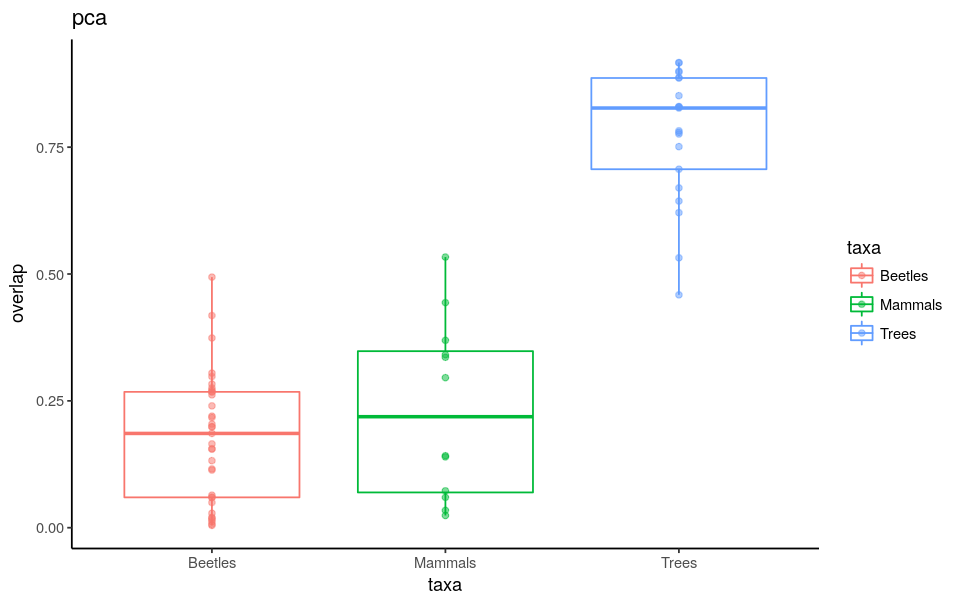

In [12]:
# boxplot
plt = ggplot(data = ovlp, aes(x = taxa, y = overlap, color = taxa))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
print(plt)

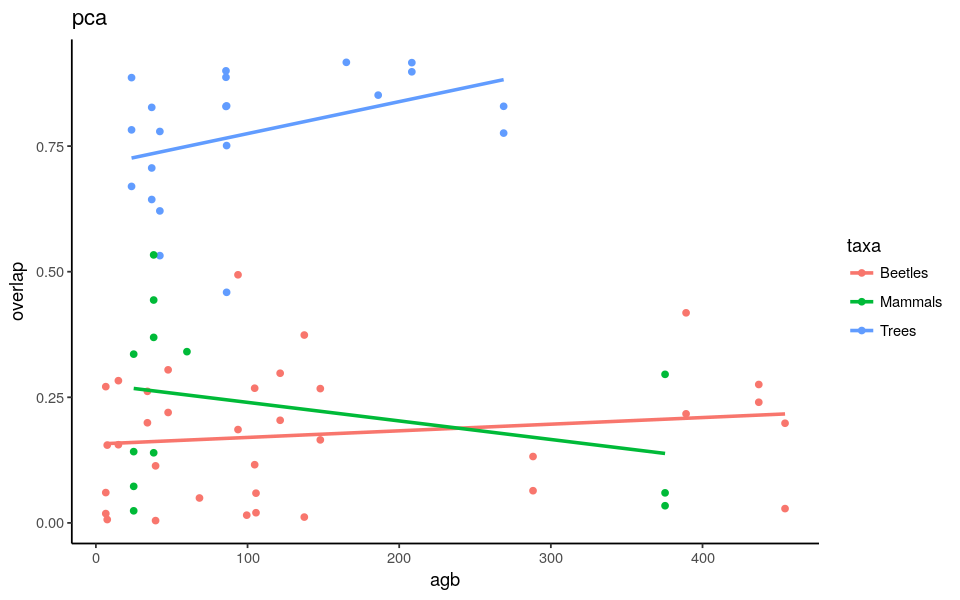

In [13]:
# overlap by agb
plt = ggplot(data = ovlp, aes(x = agb, y = overlap, color = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
print(plt)

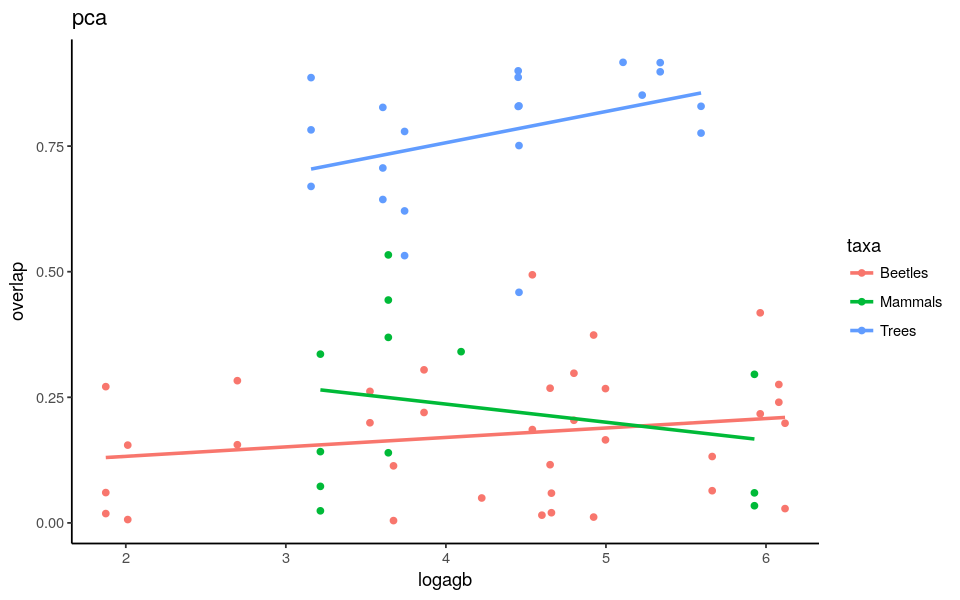

In [14]:
# overlap by log(agb)
plt = ggplot(data = ovlp, aes(x = logagb, y = overlap, color = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
print(plt)

In [15]:
# model
model = lm(overlap ~ logagb*taxa, data = ovlp)
anova(model)
summary(model)

trees_mdl = lm(overlap ~ agb, data = subset(ovlp, taxa == "Trees"))
mamls_mdl = lm(overlap ~ agb, data = subset(ovlp, taxa == "Mammals"))
btles_mdl = lm(overlap ~ agb, data = subset(ovlp, taxa == "Beetles"))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
logagb,1,0.03636241,0.03636241,2.022025,1.600436e-01
taxa,2,4.99030631,2.49515316,138.749399,1.282794e-23
logagb:taxa,2,0.06702724,0.03351362,1.863611,1.636963e-01
Residuals,62,1.11495615,0.01798316,NA,NA



Call:
lm(formula = overlap ~ logagb * taxa, data = ovlp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32610 -0.11030  0.01430  0.09213  0.31356 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)         0.09491    0.07749   1.225   0.2253  
logagb              0.01880    0.01720   1.093   0.2785  
taxaMammals         0.28578    0.17086   1.673   0.0995 .
taxaTrees           0.41305    0.17790   2.322   0.0235 *
logagb:taxaMammals -0.05485    0.03976  -1.379   0.1727  
logagb:taxaTrees    0.04337    0.04040   1.074   0.2872  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1341 on 62 degrees of freedom
Multiple R-squared:  0.8204,	Adjusted R-squared:  0.8059 
F-statistic: 56.65 on 5 and 62 DF,  p-value: < 2.2e-16


## Spatial Stabiltiy

In [16]:
# readin and sort data
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)

trees_df = add_cols(trees_df)
mamls_df = add_cols(mamls_df)
btles_df = add_cols(btles_df)

trees = melt(trees_df, id.vars=c("plot", "subplot", "census"))
mamls = melt(mamls_df, id.vars=c("plot", "subplot", "census"))
btles = melt(btles_df, id.vars=c("plot", "subplot", "census"))

In [17]:
# calculate stability
trees_stb = spatial_stability(trees)
mamls_stb = spatial_stability(mamls)
btles_stb = spatial_stability(btles)

trees_stb$taxa = "Trees"
mamls_stb$taxa = "Mammals"
btles_stb$taxa = "Beetles"

trees_stb$plot = unlist(strsplit(trees_stb$census, "_"))[ c(T,F)]
mamls_stb$plot = unlist(strsplit(mamls_stb$census, "_"))[ c(T,F)]
btles_stb$plot = unlist(strsplit(btles_stb$census, "_"))[ c(T,F)]

In [18]:
 #merge with agb
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

colnames(trees_agb) = c("plot", "agb")
colnames(mamls_agb) = c("plot", "agb")
colnames(btles_agb) = c("plot", "agb")

trees_stb = merge(trees_stb, trees_agb, by = "plot")
mamls_stb = merge(mamls_stb, mamls_agb, by = "plot")
btles_stb = merge(btles_stb, btles_agb, by = "plot")

In [19]:
# setup dataframe for plotting
stab = rbind(trees_stb, btles_stb, mamls_stb)
stab = stab[complete.cases(stab), ]
stab$taxa = as.factor(stab$taxa)

stab$agb = stab$agb*16
stab$logagb = log(stab$agb)

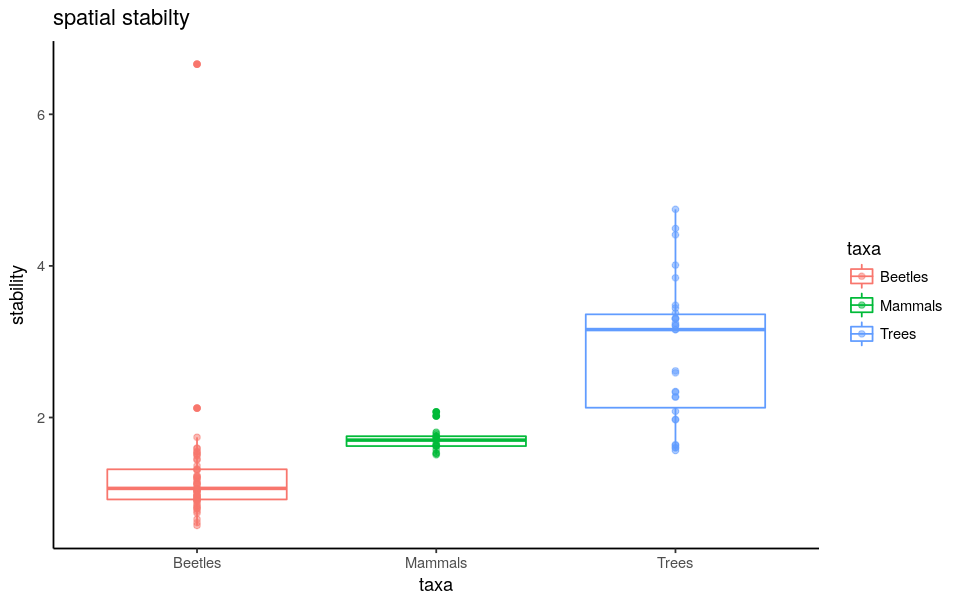

In [20]:
# boxplot
plt = ggplot(data = stab, aes(x = taxa, y = stability, color = taxa))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stabilty")
print(plt)

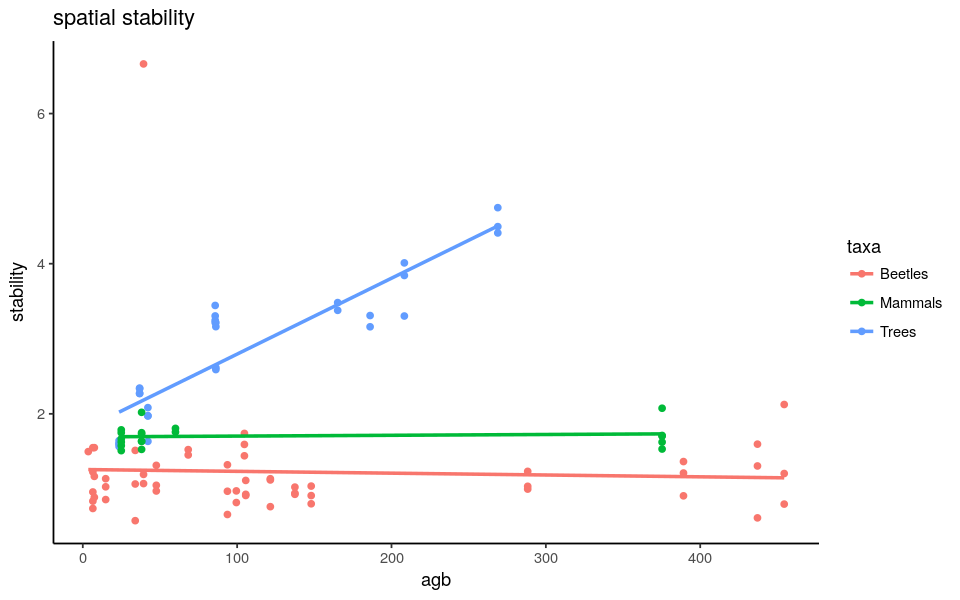

In [21]:
# stability by agb
plt = ggplot(data = stab, aes(x = agb, y = stability, color = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stability")
print(plt)

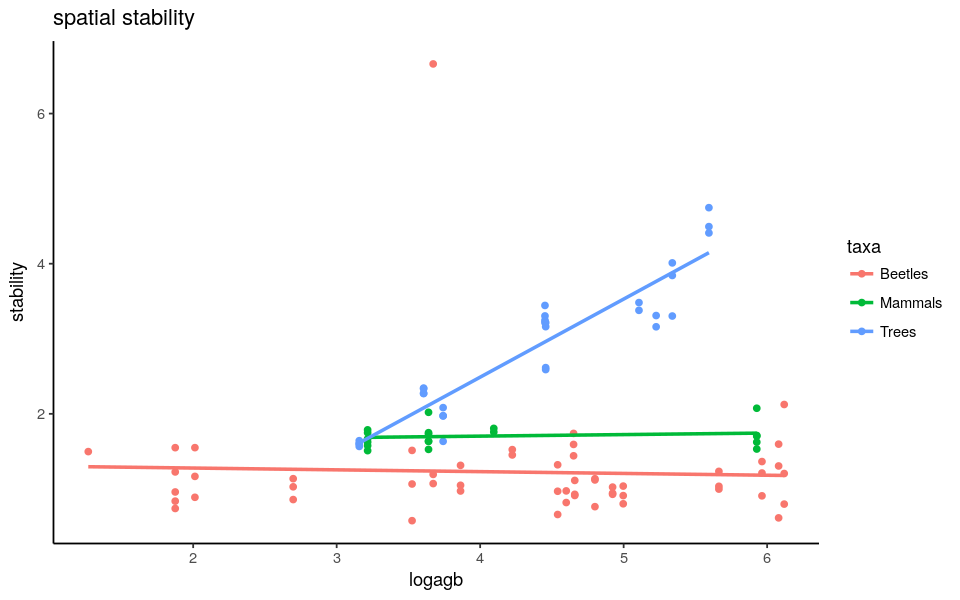

In [22]:
# stabiluty by log(agb)
plt = ggplot(data = stab, aes(x = logagb, y = stability, color = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stability")
print(plt)

In [23]:
# model
model = lm(stability ~ logagb*taxa, data = stab)
anova(model)
summary(model)

trees_mdl = lm(stability ~ agb, data = subset(stab, taxa == "Trees"))
mamls_mdl = lm(stability ~ agb, data = subset(stab, taxa == "Mammals"))
btles_mdl = lm(stability ~ agb, data = subset(stab, taxa == "Beetles"))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
logagb,1,3.661222,3.6612218,9.294178,2.955672e-03
taxa,2,51.688170,25.8440848,65.606387,8.286586e-19
logagb:taxa,2,19.047529,9.5237644,24.176510,2.920081e-09
Residuals,98,38.604783,0.3939264,NA,NA



Call:
lm(formula = stability ~ logagb * taxa, data = stab)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6647 -0.2520 -0.0608  0.1922  5.4240 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.32538    0.27496   4.820 5.24e-06 ***
logagb             -0.02393    0.06181  -0.387    0.699    
taxaMammals         0.29484    0.63037   0.468    0.641    
taxaTrees          -2.99788    0.68585  -4.371 3.08e-05 ***
logagb:taxaMammals  0.04453    0.14577   0.305    0.761    
logagb:taxaTrees    1.06413    0.15427   6.898 5.22e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6276 on 98 degrees of freedom
Multiple R-squared:  0.6584,	Adjusted R-squared:  0.6409 
F-statistic: 37.77 on 5 and 98 DF,  p-value: < 2.2e-16


## hypervolumes vs spatial stabiltiy